In [64]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../crispr_shrinkage/crispr_shrinkage/framework/')
import CrisprShrinkage as crispr_shrinkage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import expon
import numpy as np 

null_proportion = 0.5
positive_proportion = 0.6
target_null_proportion = 0.5
target_positive_population = 0.7

num_ctrl_guides = 100
num_pos_guides = 50

reps = 3
max_dup_factor = 20
max_guide_molecule_factor = 200

pop1_dup_factor_list = np.asarray([np.round(uniform.rvs(1, max_dup_factor)) for _ in range(reps)])
pop2_dup_factor_list = np.asarray([np.round(uniform.rvs(1, max_dup_factor)) for _ in range(reps)])

#expon.rvs(loc=1, scale=1000, size=num_guides)
#uniform.rvs(2, 200, size=num_guides)
def get_counts(num_guides, proportion):
    pop1_list_reps = []
    pop2_list_reps = []

    for rep_i in range(reps):
        n_list = np.round(uniform.rvs(2, max_guide_molecule_factor, size=num_guides)).astype(int)
        pop1_list = binom.rvs(n_list, proportion, size=num_guides) 
        pop2_list = n_list - pop1_list

        pop1_list_reps.append(pop1_list * pop1_dup_factor_list[rep_i])
        pop2_list_reps.append(pop2_list * pop2_dup_factor_list[rep_i])
    
    return np.asarray(pop1_list_reps), np.asarray(pop2_list_reps)


In [66]:
tiling_length = 100

observation_guides = []
for position in range(tiling_length):
    counts = get_counts(1, target_null_proportion)
    pop1_raw_count_reps = counts[0].transpose()[0] + 1
    pop2_raw_count_reps = counts[1].transpose()[0] + 1
    guide = crispr_shrinkage.Guide(identifier="observation_{}".format(position), position=position, pop1_raw_count_reps= pop1_raw_count_reps, pop2_raw_count_reps=pop2_raw_count_reps)

    observation_guides.append(guide)

observation_guides = np.asarray(observation_guides)

In [67]:
negative_guides = []
for i in range(num_ctrl_guides):
    counts = get_counts(1, null_proportion)
    pop1_raw_count_reps = counts[0].transpose()[0] + 1
    pop2_raw_count_reps = counts[1].transpose()[0] + 1
    guide = crispr_shrinkage.Guide(identifier="negative_{}".format(i), position=None, pop1_raw_count_reps= pop1_raw_count_reps, pop2_raw_count_reps=pop2_raw_count_reps)

    negative_guides.append(guide)

negative_guides = np.asarray(negative_guides)

In [68]:
positive_guides = []
for i in range(num_pos_guides):
    counts = get_counts(1, positive_proportion)
    pop1_raw_count_reps = counts[0].transpose()[0] + 1
    pop2_raw_count_reps = counts[1].transpose()[0] + 1
    guide = crispr_shrinkage.Guide(identifier="positive_{}".format(i), position=None, pop1_raw_count_reps= pop1_raw_count_reps, pop2_raw_count_reps=pop2_raw_count_reps)

    positive_guides.append(guide)

positive_guides = np.asarray(positive_guides)

Optimizing imputation weights
X: [0.11185524 1.20064994], f: 0.3784015620831817
X: [0.0659544  0.27561024], f: 0.2166567558198857
X: [0.01240803 9.50689618], f: 0.03889633378080062
X: [0.01240803 9.50689618], f: 0.03889633378080062
X: [0.01240803 9.50689618], f: 0.03889633378080062
X: [0.00854506 0.92877215], f: 0.023308260962672946
X: [0.00519996 3.04376455], f: 0.014321642441567618
X: [4.05539043e-03 5.01445621e+00], f: 0.01200795426819075
X: [6.21977343e-04 2.56304787e+00], f: 0.007494701692189203
X: [1.23722031e-03 2.91772293e+00], f: 0.006664140377488529
X: [1.23722031e-03 2.91772293e+00], f: 0.006664140377488529
X: [1.23722031e-03 2.91772293e+00], f: 0.006664140377488529
X: [1.23722031e-03 2.91772293e+00], f: 0.006664140377488529
X: [1.29525043e-03 2.73289237e+00], f: 0.006657071882506208
X: [1.18665157e-03 2.61536302e+00], f: 0.006652558588983808
X: [1.22922074e-03 2.46467059e+00], f: 0.006648126076139953
X: [1.22922074e-03 2.46467059e+00], f: 0.006648126076139953


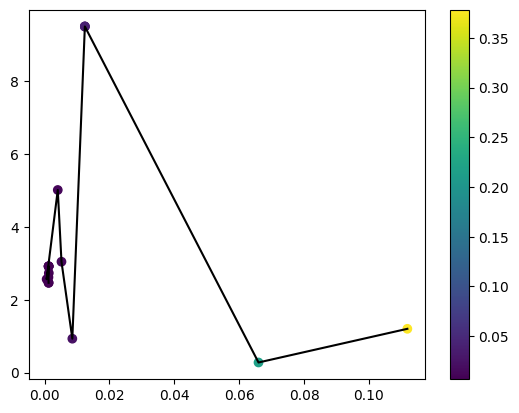

KL Negative Set Average: 0.0033752855376938482
KL Positive Set Average: 0.020006417668102863
KL Observation Set Average: 0.003241046452881413
KL Combined Set Average: 0.006647816329850677
X: [0.14777105 5.15880379], f: 0.2384983334916485
X: [0.14777105 2.59554981], f: 0.2379280063110307
X: [0.01396169 6.55180839], f: 0.016729010205960144
X: [0.01396169 6.55180839], f: 0.016729010205960144
X: [7.02661772e-04 6.74660650e+00], f: 0.0069154806012235925
X: [7.02661772e-04 6.74660650e+00], f: 0.0069154806012235925
X: [7.02661772e-04 6.74660650e+00], f: 0.0069154806012235925
X: [7.02661772e-04 6.74660650e+00], f: 0.0069154806012235925
X: [2.63081400e-03 7.02516398e+00], f: 0.004615642629264485
X: [2.63081400e-03 7.02516398e+00], f: 0.004615642629264485
X: [2.63081400e-03 7.02516398e+00], f: 0.004615642629264485
X: [2.41348328e-03 6.85995238e+00], f: 0.0045997667306222996
X: [2.41348328e-03 6.85995238e+00], f: 0.0045997667306222996
X: [2.56213160e-03 4.38733559e+00], f: 0.004585350378023726
X:

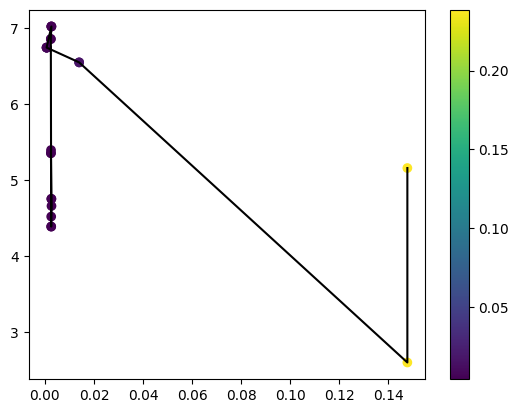

KL Negative Set Average: 0.0020171818276762464
KL Positive Set Average: 0.018531849650030238
KL Observation Set Average: 0.00010336796953089867
KL Combined Set Average: 0.004554589848888906
X: [0.05043542 8.51362826], f: 0.10229265066069916
X: [0.04343679 0.67668643], f: 0.07123049415257174
X: [4.61941232e-03 8.60427773e+00], f: 0.024883276671370993
X: [4.61941232e-03 8.60427773e+00], f: 0.024883276671370993
X: [4.61941232e-03 8.60427773e+00], f: 0.024883276671370993
X: [4.61941232e-03 8.60427773e+00], f: 0.024883276671370993
X: [4.61941232e-03 8.60427773e+00], f: 0.024883276671370993
X: [0.00764857 1.05386457], f: 0.012406163961120804
X: [0.00715622 1.10394323], f: 0.011899260293469646
X: [0.00715622 1.10394323], f: 0.011899260293469646
X: [0.0044558  0.19398925], f: 0.007854571577037846
X: [0.0044558  0.19398925], f: 0.007854571577037846
X: [0.00211038 0.39040979], f: 0.007622085608686831
X: [0.00391349 0.14889256], f: 0.007509771605531228
X: [0.00297709 0.19344004], f: 0.00730441085

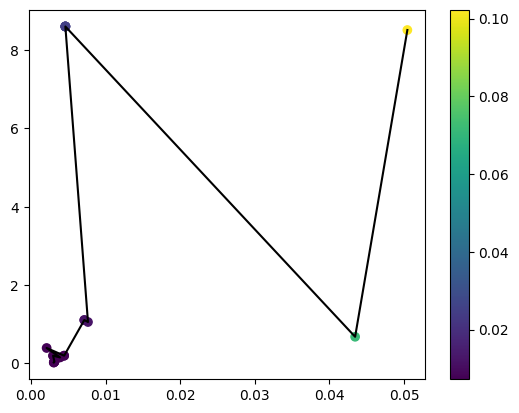

KL Negative Set Average: 0.007555453746308629
KL Positive Set Average: 0.00980917996781649
KL Observation Set Average: 0.005597866588070559
KL Combined Set Average: 0.0072231641273149735
Selected imputation weights: (array([0.00124402, 0.00251311, 0.00313032]), array([2.46467060e+00, 5.39625045e+00, 1.00000000e-06]))
Optimizing shrinkage prior weights
[1.e-06]
3.136641939008089
 
[1.01e-06]
3.136658415360416
 
[1.e-06]
14.862302153830754
 
[1.01e-06]
14.86322170678054
 
[1.e-06]
20.41364586357377
 
[1.01e-06]
20.413609119993904
 
[1.000001]
1.6610683428468942
 
[1.00000101]
1.6610683282677563
 
[1.00039794]
1.6604900652463561
 
[1.00039795]
1.6604900506885345
 
[1.00198569]
1.6581855104806476
 
[1.0019857]
1.6581854960091347
 
[1.0083367]
1.6491028304094435
 
[1.00833671]
1.649102816277348
 
[1.03374073]
1.6148572718730936
 
[1.03374074]
1.6148572590252153
 
[1.28412722]
1.409532327135743
 
[1.28412723]
1.4095323224726286
 
[1.42678018]
1.3617290864424758
 
[1.42678019]
1.3617290842222

In [69]:
# LEFTOFF - just modifed result to return each guide set separately. So should be able to plot by position and verify that the shrinkage and all works well. Very interested to see if the negatiev controls are over shrunk. and positive controls. since they dont have position.
results = crispr_shrinkage.perform_adjustment(
    negative_control_guides = negative_guides,
    positive_control_guides = positive_guides,
    observation_guides = observation_guides,
    num_replicates = reps,
    include_observational_guides_in_fit = True,
    include_positive_control_guides_in_fit = False,
    pop1_amplification_factors = pop1_dup_factor_list,
    pop2_amplification_factors = pop2_dup_factor_list,
    monte_carlo_trials = 1000,
    enable_spatial_prior =  True,
    spatial_bandwidth = 3,
    spatial_imputation_model_weights = None,
    baseline_proportion = 0.5, # TODO: Perform validation between (0,1), also accept None value for perfrming no normalization (or have that be another argument)
    shrinkage_prior_strength = None,
    posterior_estimator = "mean",
    random_seed = 234
    )

In [76]:
positive_positions = [guide.position for guide in results.adjusted_positive_control_guides]
observational_position = [guide.position for guide in results.adjusted_observation_guides]

In [77]:
negative_lfc = [guide.LFC_estimate_combined for guide in results.adjusted_negative_control_guides]
positive_lfc = [guide.LFC_estimate_combined for guide in results.adjusted_positive_control_guides]
observational_lfc = [guide.LFC_estimate_combined for guide in results.adjusted_observation_guides]

(array([0.18520525, 0.18520525, 0.55561574, 0.18520525, 0.55561574,
        2.03725771, 6.11177313, 6.85259411, 1.11123148, 0.74082099]),
 array([-0.38665523, -0.33266108, -0.27866693, -0.22467278, -0.17067863,
        -0.11668448, -0.06269033, -0.00869618,  0.04529798,  0.09929213,
         0.15328628]),
 <BarContainer object of 10 artists>)

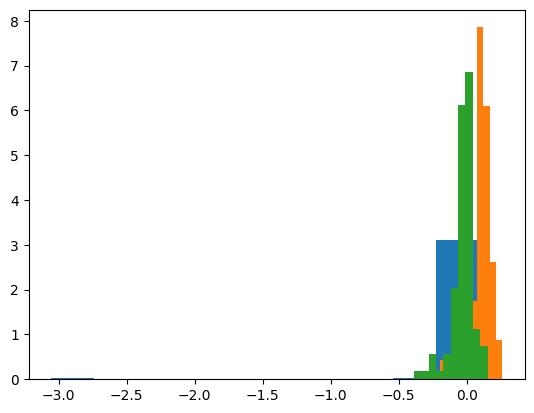

In [78]:
import matplotlib.pyplot as plt
plt.hist(negative_lfc, density=True)
plt.hist(positive_lfc, density=True)
plt.hist(observational_lfc, density=True)

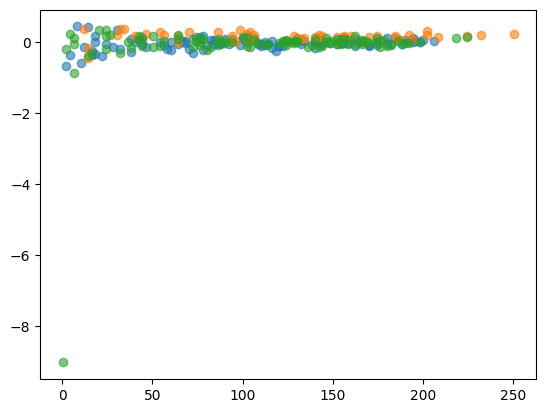

In [72]:
rep_i = 0 
observational_lfc_rep = [guide.LFC_estimate_per_replicate[rep_i] for guide in results.adjusted_observation_guides]
observational_count_rep = [guide.pop1_normalized_count_reps[rep_i] + guide.pop1_normalized_count_reps[rep_i] for guide in results.adjusted_observation_guides]

positive_lfc_rep = [guide.LFC_estimate_per_replicate[rep_i] for guide in results.adjusted_positive_control_guides]
positive_count_rep = [guide.pop1_normalized_count_reps[rep_i] + guide.pop1_normalized_count_reps[rep_i] for guide in results.adjusted_positive_control_guides]

negative_lfc_rep = [guide.LFC_estimate_per_replicate[rep_i] for guide in results.adjusted_negative_control_guides]
negative_count_rep = [guide.pop1_normalized_count_reps[rep_i] + guide.pop1_normalized_count_reps[rep_i] for guide in results.adjusted_negative_control_guides]

plt.scatter(observational_count_rep, observational_lfc_rep, alpha=0.6, label="observation")
plt.scatter(positive_count_rep, positive_lfc_rep, alpha=0.6, label="observation")
plt.scatter(negative_count_rep, negative_lfc_rep, alpha=0.6, label="observation")

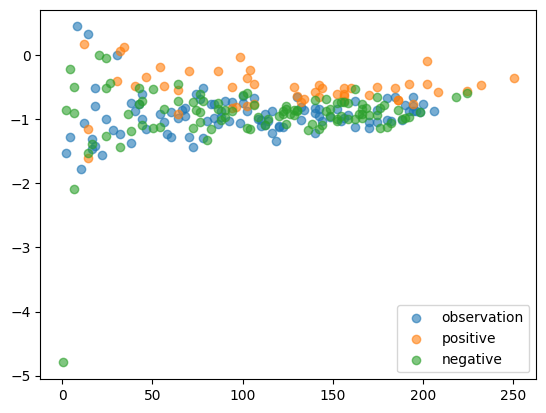

In [75]:
rep_i = 0 
observational_raw_lfc_rep = [np.log(guide.pop1_raw_count_reps[rep_i]/guide.pop2_raw_count_reps[rep_i]) for guide in results.raw_observation_guides]

positive_raw_lfc_rep = [np.log(guide.pop1_raw_count_reps[rep_i]/guide.pop2_raw_count_reps[rep_i]) for guide in results.raw_positive_control_guides]

negative_raw_lfc_rep = [np.log(guide.pop1_raw_count_reps[rep_i]/guide.pop2_raw_count_reps[rep_i]) for guide in results.raw_negative_control_guides]

plt.scatter(observational_count_rep, observational_raw_lfc_rep, alpha=0.6, label="observation")
plt.scatter(positive_count_rep, positive_raw_lfc_rep, alpha=0.6, label="positive")
plt.scatter(negative_count_rep, negative_raw_lfc_rep, alpha=0.6, label="negative")
plt.legend()
plt.show()

In [ ]:
plt.scatter(observational_count_rep, observational_raw_lfc_rep, alpha=0.6, label="observation")
plt.scatter(positive_count_rep, positive_raw_lfc_rep, alpha=0.6, label="positive")
plt.scatter(negative_count_rep, negative_raw_lfc_rep, alpha=0.6, label="negative")
plt.legend()
plt.show()

In [ ]:
# LEFTOFF: It seems that the shrinkage optimization is not working appropriately. I wonder if it is due to the position-less guide counts. Try and increase the position-containing positive control guides to see how the respond to shrinkage. Also compare the LFC before and after and validate where shrinkage is. Would also be nice to create another simulation example to test neighborhood. Also try and plot intermediate plots in the package (i.e. visualizing and logging optimization performance.)

In [ ]:
plt.scatter(observational_position, observational_lfc)

In [ ]:
crispr_shrinkage.Guide